In [317]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

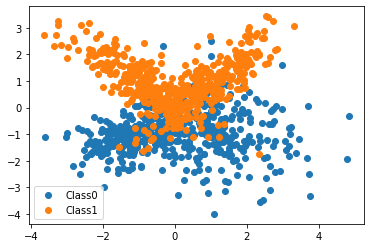

In [318]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0)
plt.scatter(X[:,0][y==0], X[:,1][y==0], label="Class0")
plt.scatter(X[:,0][y==1], X[:,1][y==1], label="Class1")
plt.legend()
plt.show()

In [319]:
cv_results = {}
cv = KFold(n_splits=5)
for idx, (train_idx, test_idx) in enumerate(cv.split(X)):
    clf = LogisticRegression().fit(X[train_idx], y[train_idx])
    test_predictions = clf.predict_proba(X[test_idx])[:,1]
    cv_results["{}-fold".format(idx)] = {
        "test_predictions": test_predictions,
        "test_idx": test_idx
    }

In [320]:
roc_curve_cv = {}
for key in cv_results:
    fpr, tpr, thresholds = roc_curve(y[cv_results[key]["test_idx"]], cv_results[key]["test_predictions"])
    roc_curve_cv[key] = {
        "fpr": fpr,
        "tpr": tpr,
        "thresholds": thresholds
    }

In [321]:
average_roc = {
    "fpr": list(),
    "tpr": list(),
    "thresholds": list(),
    "confidence": list()
}
for fpr in np.linspace(0,1,11):
    # false positive rates less than or equal to threshold
    fpr_lte = list()
    tpr_lte = list()
    threshold_lte = list()
    for key in roc_curve_cv:
        fpr_lte\
        .append(roc_curve_cv[key]["fpr"][sum(roc_curve_cv[key]["fpr"] <= fpr)-1])
        tpr_lte\
        .append(roc_curve_cv[key]["tpr"][sum(roc_curve_cv[key]["fpr"] <= fpr)-1])
        threshold_lte\
        .append(roc_curve_cv[key]["thresholds"][sum(roc_curve_cv[key]["fpr"] <= fpr)-1])
    # binomial confidence interval
    p = np.array(tpr_lte).mean()
    top = p+(1.96*np.sqrt((p*(1-p))/len(roc_curve_cv[key]["thresholds"])))
    bottom = p-(1.96*np.sqrt((p*(1-p))/len(roc_curve_cv[key]["thresholds"])))
    average_roc["fpr"].append(np.array(fpr_lte).mean())
    average_roc["tpr"].append(np.array(tpr_lte).mean())
    average_roc["thresholds"].append(np.array(threshold_lte).mean())
    average_roc["confidence"].append(top-bottom)

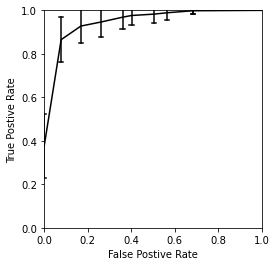

In [322]:
plt.plot(average_roc["fpr"], average_roc["tpr"], label="ROC curve", color='k')
for fpr, tpr, threshold, confidence in zip(average_roc["fpr"], average_roc["tpr"], average_roc["thresholds"], average_roc["confidence"]):
    if (confidence):
        plt.plot([fpr,fpr],[tpr-(0.5*confidence),tpr+(0.5*confidence)], color='k')
        plt.plot([fpr-0.01,fpr+0.01],[tpr-(0.5*confidence),tpr-(0.5*confidence)], color='k')
        plt.plot([fpr-0.01,fpr+0.01],[tpr+(0.5*confidence),tpr+(0.5*confidence)], color='k')
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.gca().set_aspect("equal")
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [327]:
average_roc = {
    "fpr": list(),
    "tpr": list(),
    "thresholds": list(),
    "fpr_confidence": list(),
    "tpr_confidence": list()
}
for threshold in np.linspace(0,1,11):
    # false positive rates less than or equal to threshold
    fpr_lte = list()
    tpr_lte = list()
    threshold_lte = list()
    for key in roc_curve_cv:
        fpr_lte\
        .append(roc_curve_cv[key]["fpr"][sum(roc_curve_cv[key]["thresholds"] <= threshold)])
        tpr_lte\
        .append(roc_curve_cv[key]["tpr"][sum(roc_curve_cv[key]["thresholds"] <= threshold)])
        threshold_lte\
        .append(roc_curve_cv[key]["thresholds"][sum(roc_curve_cv[key]["thresholds"] <= threshold)])
    # binomial confidence interval
    average_roc["fpr"].append(np.array(fpr_lte).mean())
    average_roc["tpr"].append(np.array(tpr_lte).mean())
    average_roc["thresholds"].append(np.array(threshold_lte).mean())
    average_roc["fpr_confidence"].append(np.array(fpr_lte).std())
    average_roc["tpr_confidence"].append(np.array(tpr_lte).std())

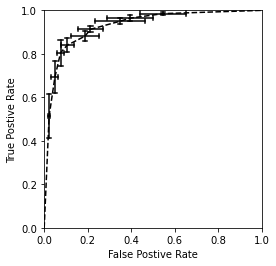

In [328]:
plt.plot(average_roc["fpr"], average_roc["tpr"], label="ROC curve", color='k', linestyle='--',)
for fpr, tpr, threshold, fpr_confidence, tpr_confidence in zip(average_roc["fpr"], average_roc["tpr"], average_roc["thresholds"], average_roc["fpr_confidence"], average_roc["tpr_confidence"]):
    if (fpr_confidence):
        plt.plot([fpr-(0.5*fpr_confidence),fpr+(0.5*fpr_confidence)], [tpr,tpr], color='k')
        plt.plot([fpr-(0.5*fpr_confidence),fpr-(0.5*fpr_confidence)], [tpr-0.01,tpr+0.01], color='k')
        plt.plot([fpr+(0.5*fpr_confidence),fpr+(0.5*fpr_confidence)], [tpr-0.01,tpr+0.01], color='k')
    if (tpr_confidence):
        plt.plot([fpr,fpr],[tpr-(0.5*tpr_confidence),tpr+(0.5*tpr_confidence)], color='k')
        plt.plot([fpr-0.01,fpr+0.01],[tpr-(0.5*tpr_confidence),tpr-(0.5*tpr_confidence)], color='k')
        plt.plot([fpr-0.01,fpr+0.01],[tpr+(0.5*tpr_confidence),tpr+(0.5*tpr_confidence)], color='k')
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.gca().set_aspect("equal")
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()